In [2]:
from sage.all import *

import networkx as nx
from networkx.algorithms import isomorphism
import matplotlib.pyplot as plt
import numpy as np
from sage.graphs.graph_generators import graphs
import pandas as pd
import random
from sage.graphs.graph import Graph 
from sage.graphs.generators.random import RandomGNP
from networkx.generators.nonisomorphic_trees import nonisomorphic_trees
import seaborn as sns
from pulp import LpMinimize, LpProblem, LpVariable, lpSum, LpBinary
from ast import literal_eval
from scipy import stats
from collections import defaultdict
from collections import Counter
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder
import math
from sympy import sqrt, pi, N, evalf
import ast
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc


Sym = SymmetricFunctions(QQ)
e = Sym.e()
p = Sym.p()
s = Sym.s()


With SageMath, we can generate all connected graphs with 9 vertices, compute their graph invariants, and create a CSV file named ''stats_graphs_9_vertices''.

In [3]:
df_9_stat = pd.read_csv("stats_graphs_9_vertices.csv", index_col = 0)
df_9_stat.head(1)

,Unnamed: 0,edges,energy,Au_Ha,max_degree,number_of_edges,girth,dominant_number,clique_number,independence_number,...,matching_number,domination_number,is_bipartite,e_pos,toughness,num_claws,min_ind_cut,claw_contractible_free,has_all_partitions,has_Hamiltonian_path
0,0,"[(0, 8), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8...",8.0,15.549834,8,8,0.0,1,2,8,...,1,8,1,0,0.125,56,1,0,0,0


In [3]:
df = df_9_stat.drop(['Unnamed: 0', 'edges'], axis=1)
import ast


df['algebraic_connectivity'] = df['algebraic_connectivity'].apply(lambda x: complex(ast.literal_eval(x)).real if isinstance(x, str) else x).astype(float)
df = df.dropna()

df = df.drop(['degree_distribution'], axis=1)
df.head(1)

,energy,Au_Ha,max_degree,number_of_edges,girth,dominant_number,clique_number,independence_number,algebraic_connectivity,assortativity,...,matching_number,domination_number,is_bipartite,e_pos,toughness,num_claws,min_ind_cut,claw_contractible_free,has_all_partitions,has_Hamiltonian_path
0,8.0,15.549834,8,8,0.0,1,2,8,1.0,-1.0,...,1,8,1,0,0.125,56,1,0,0,0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        11,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,577 (221.00 KB)

 Trainable params: 55,681 (217.50 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8708 - loss: 0.3382 - precision: 0.8548 - recall: 0.8105 - val_accuracy: 0.8810 - val_loss: 0.3135 - val_precision: 0.8787 - val_recall: 0.8108 - learning_rate: 0.0010
Epoch 2/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8856 - loss: 0.3009 - precision: 0.8718 - recall: 0.8330 - val_accuracy: 0.8860 - val_loss: 0.2926 - val_precision: 0.8664 - val_recall: 0.8412 - learning_rate: 0.0010
Epoch 3/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8895 - loss: 0.2868 - precision: 0.8755 - recall: 0.8396 - val_accuracy: 0.8871 - val_loss: 0.2860 - val_precision: 0.8807 - val_recall: 0.8261 - learning_rate: 0.0010
Epoch 4/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8925 - loss: 0.2750 - precision: 0.8772 - recall: 0.8462 - val_accuracy: 0.8923 - val_loss: 0.2758 - val_precision: 0.8825 - val_recall: 0.8391 - learning_rate: 0.0010
Epoch 5/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accur

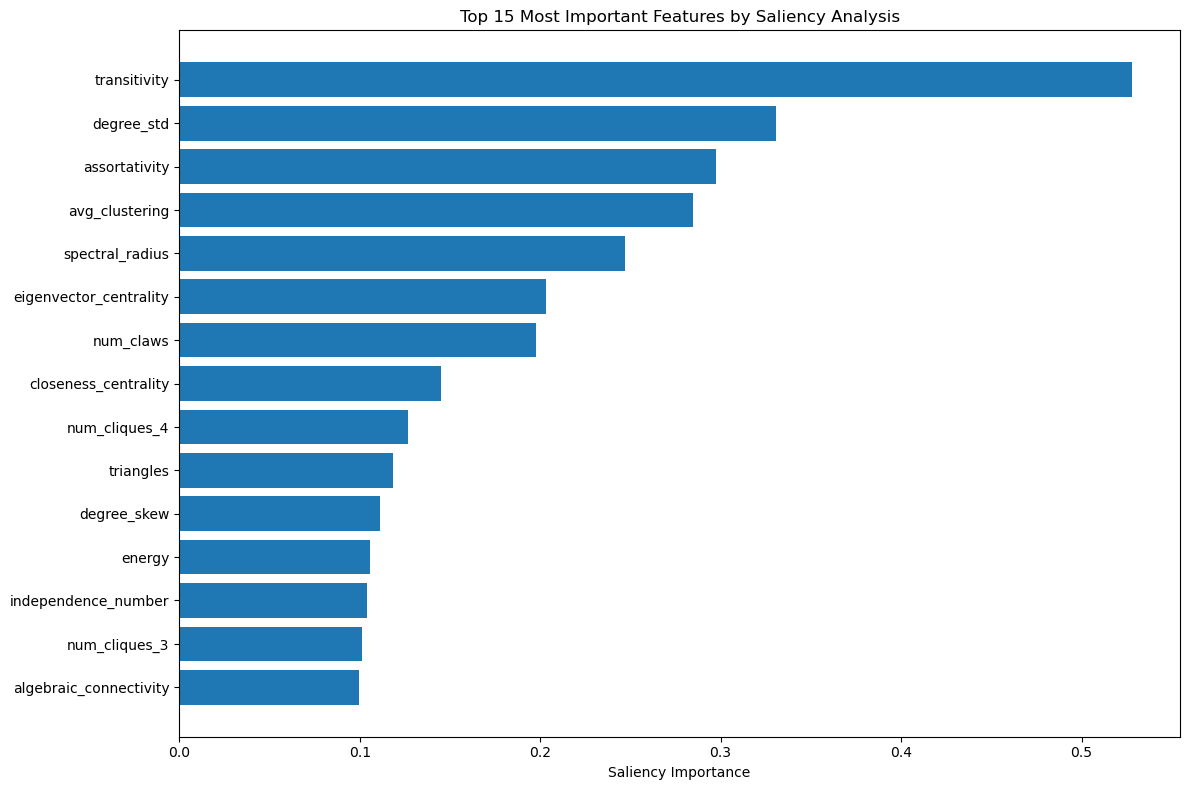

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

def weighted_binary_crossentropy(fp_weight=10.0):
    """
    Custom loss that heavily penalizes False Positives
    fp_weight: How much more to penalize False Positives vs other errors
    """
    def loss(y_true, y_pred):
        # Standard binary crossentropy
        bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
        
        # Calculate penalty for false positives
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        
        # False positives: where y_true=0 but y_pred is high
        fp_penalty = (1 - y_true) * y_pred * fp_weight
        
        # Combine standard loss with FP penalty
        return bce + tf.reduce_mean(fp_penalty)
    
    return loss

# For extreme FP penalty
custom_loss = weighted_binary_crossentropy(fp_weight=15.0)


def create_graph_classifier(input_dim=47):
    model = Sequential([
        # Input layer - larger initial layer to capture complex graph relationships
        Dense(256, activation='relu', input_shape=(input_dim,)
              , kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)
             ),
        BatchNormalization(),
        #Dropout(0.4),
        
        # Hidden layers - gradually decreasing complexity
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)
             ),
        BatchNormalization(),
        #Dropout(0.3),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        #Dropout(0.2),
        
        Dense(32, activation='relu'),
        #Dropout(0.1),
        
        # Output layer for binary classification
        Dense(1, activation='sigmoid')
    ])
    
    return model

# Create model
model = create_graph_classifier(input_dim=44)
model.summary()

# Data preparation
feature_columns = ['energy',
 'Au_Ha',
 'max_degree',
 'number_of_edges',
 'girth',
 'dominant_number',
 'clique_number',
 'independence_number',
 'algebraic_connectivity',
 'assortativity',
 'avg_clustering',
 'avg_degree',
 'avg_degree_connectivity',
 'avg_shortest_path',
 'betweenness_centrality',
 'closeness_centrality',
 'degree_kurtosis',
 'degree_skew',
 'degree_std',
 'density',
 'diameter',
 'eigenvector_centrality',
 'modularity',
 'num_edges',
# 'num_nodes',
 'radius',
 'spectral_radius',
 'transitivity',
# 'self_loops',
# 'connected_components',
 'min_degree',
 'triangles',
 'num_cycles_3',
 'num_cycles_4',
 'num_cliques_3',
 'num_cliques_4',
 'articulation_points',
 'bridges',
 'matching_number',
 'domination_number',
 'is_bipartite',
 'toughness',
 'num_claws',
 'min_ind_cut',
 'claw_contractible_free',
 'has_all_partitions',
 'has_Hamiltonian_path']


X = df[feature_columns].values
y = df['e_pos'].values

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compile model with custom loss
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=weighted_binary_crossentropy(fp_weight=00.0),  # Start with 15, adjust as needed
    metrics=['accuracy', 'precision', 'recall']
)

# Callbacks
callbacks = [
    EarlyStopping(patience=15, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
]

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=512,  # Larger batch size for 261k samples
    callbacks=callbacks,
    verbose=1
)

import matplotlib.pyplot as plt
import pandas as pd

def compute_saliency_map(model, X_sample, feature_names):
    """
    Compute saliency maps for feature importance analysis
    """
    X_sample_tensor = tf.convert_to_tensor(X_sample, dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(X_sample_tensor)
        predictions = model(X_sample_tensor)
    
    # Compute gradients of output wrt inputs
    gradients = tape.gradient(predictions, X_sample_tensor)
    
    # Take absolute values and average across samples
    saliency = tf.abs(gradients)
    avg_saliency = tf.reduce_mean(saliency, axis=0)
    
    # Create feature importance dataframe
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': avg_saliency.numpy()
    }).sort_values('importance', ascending=False)
    
    return importance_df, saliency.numpy()

# Compute saliency on test set
importance_df, saliency_maps = compute_saliency_map(
    model, X_test_scaled, feature_columns  # Use subset for efficiency
)

print("Top 15 Most Important Features:")
print(importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['feature'][:15], importance_df['importance'][:15])
plt.xlabel('Saliency Importance')
plt.title('Top 15 Most Important Features by Saliency Analysis')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [5]:
features = list(importance_df['feature'][:15])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 256)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,153 (192.00 KB)

 Trainable params: 48,257 (188.50 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6761 - loss: 129.9122 - precision: 0.9098 - recall: 0.1997 - val_accuracy: 0.6082 - val_loss: 3.3652 - val_precision: 1.0000 - val_recall: 0.0081 - learning_rate: 0.0010
Epoch 2/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6153 - loss: 4.8894 - precision: 0.9995 - recall: 0.0261 - val_accuracy: 0.6076 - val_loss: 3.4817 - val_precision: 1.0000 - val_recall: 0.0066 - learning_rate: 0.0010
Epoch 3/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6121 - loss: 4.1665 - precision: 1.0000 - recall: 0.0180 - val_accuracy: 0.6056 - val_loss: 3.7004 - val_precision: 1.0000 - val_recall: 0.0015 - learning_rate: 0.0010
Epoch 4/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6109 - loss: 4.0665 - precision: 0.9992 - recall: 0.0149 - val_accuracy: 0.6052 - val_loss: 3.7354 - val_precision: 1.0000 - val_recall: 5.3336e-04 - learning_rate: 0.0010
Epoch 5/100
408/408 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step -

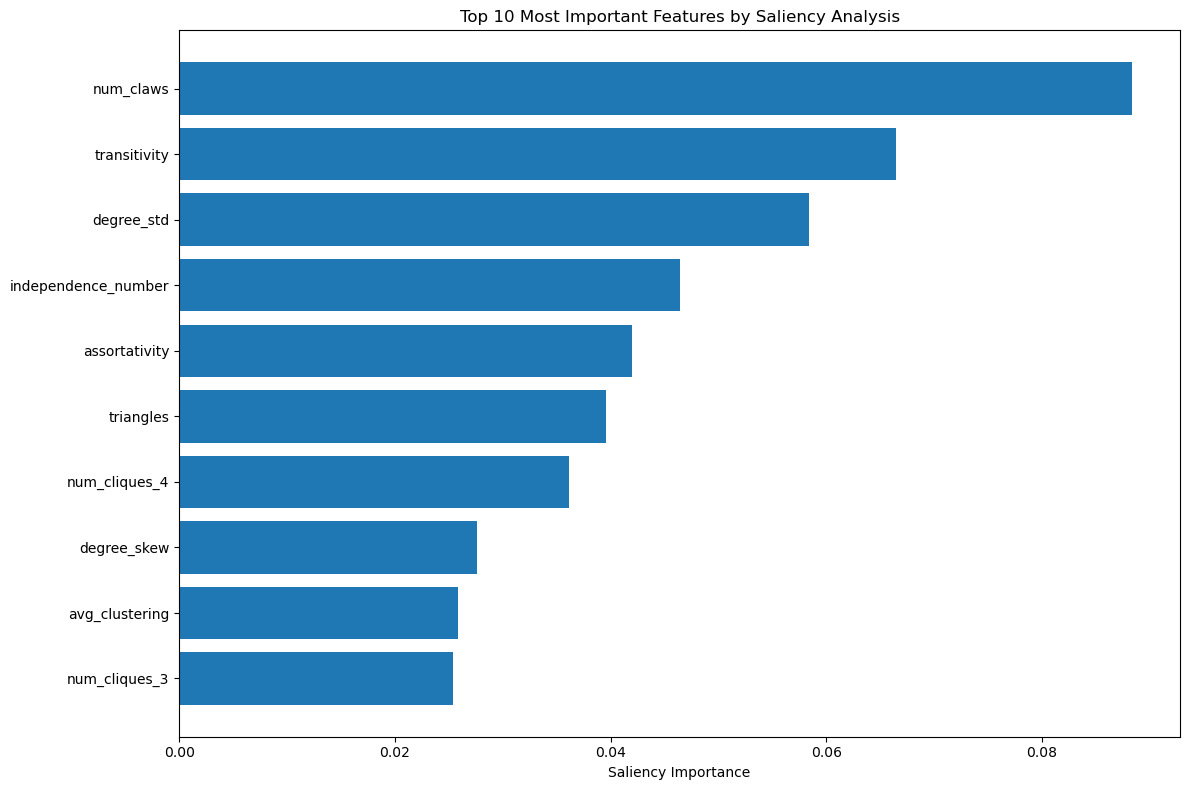

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

def create_graph_classifier(input_dim=15):
    model = Sequential([
        # Input layer 
        Dense(256, activation='relu', input_shape=(input_dim,)
              , kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)
             ),
        BatchNormalization(),
        Dropout(0.4),
        
        # Hidden layers 
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)
             ),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(32, activation='relu'),
        Dropout(0.1),
        
        # Output layer for binary classification
        Dense(1, activation='sigmoid')
    ])
    
    return model

# Create model
model = create_graph_classifier(input_dim=15)
model.summary()


# Data preparation
feature_columns = features
# Assuming your dataframe is called 'df'
X = df[feature_columns].values
y = df['e_pos'].values

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compile model with custom loss
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=weighted_binary_crossentropy(fp_weight=10000.0),  # Start with 15, adjust as needed
    metrics=['accuracy', 'precision', 'recall']
)

# Callbacks
callbacks = [
    EarlyStopping(patience=15, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
]

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=512,  # Larger batch size for 261k samples
    callbacks=callbacks,
    verbose=1
)

import matplotlib.pyplot as plt
import pandas as pd

def compute_saliency_map(model, X_sample, feature_names):
    """
    Compute saliency maps for feature importance analysis
    """
    X_sample_tensor = tf.convert_to_tensor(X_sample, dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(X_sample_tensor)
        predictions = model(X_sample_tensor)
    
    # Compute gradients of output wrt inputs
    gradients = tape.gradient(predictions, X_sample_tensor)
    
    # Take absolute values and average across samples
    saliency = tf.abs(gradients)
    avg_saliency = tf.reduce_mean(saliency, axis=0)
    
    # Create feature importance dataframe
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': avg_saliency.numpy()
    }).sort_values('importance', ascending=False)
    
    return importance_df, saliency.numpy()

# Compute saliency on test set
importance_df, saliency_maps = compute_saliency_map(
    model, X_test_scaled[:], feature_columns  # Use subset for efficiency
)

print("Top 10 Most Important Features:")
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['feature'][:10], importance_df['importance'][:10])
plt.xlabel('Saliency Importance')
plt.title('Top 10 Most Important Features by Saliency Analysis')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

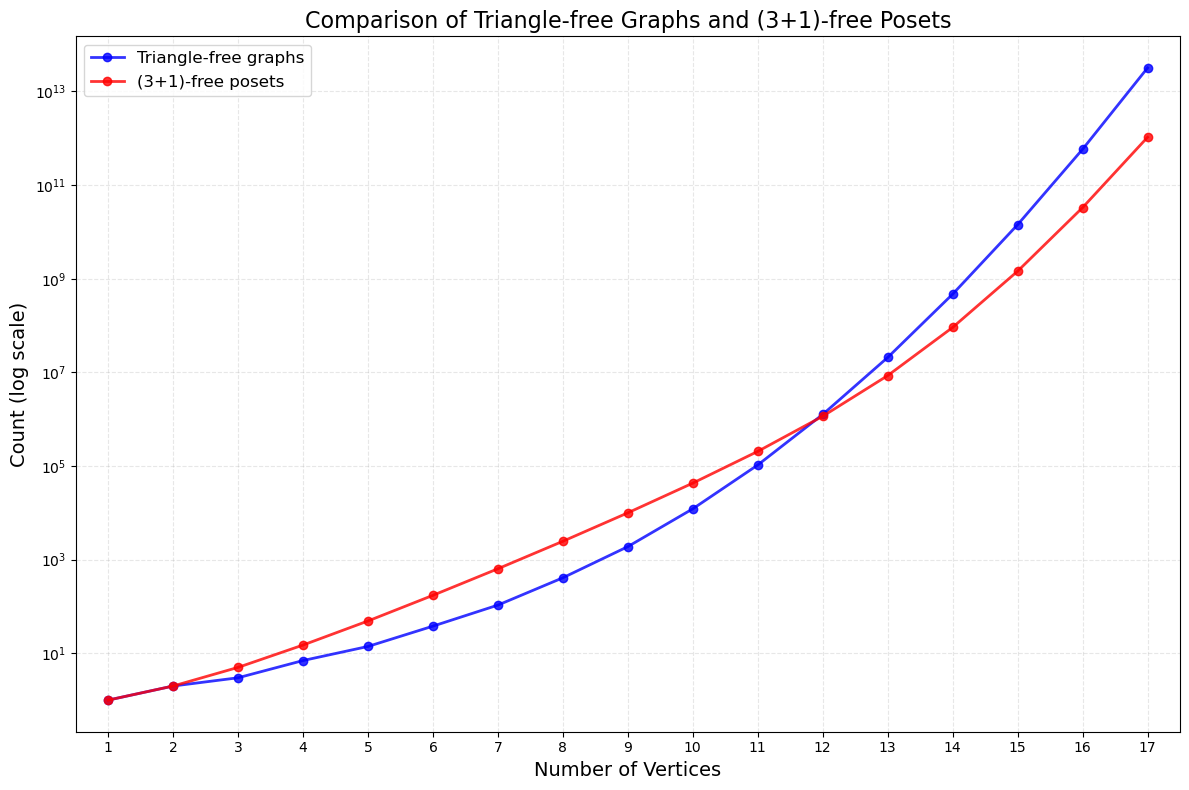

Sequence lengths:
Triangle-free graphs: 17 terms
(3+1)-free posets: 17 terms

Last values:
Triangle-free graphs: 3.17e+13
(3+1)-free posets: 1.05e+12


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Define the sequences
triangle_free_graphs = [1, 2, 3, 7, 14, 38, 107, 410, 1897, 12172, 105071, 1262180, 20797002, 467871369, 14232552452, 581460254001, 31720840164950]

three_one_free_posets = [1, 2, 5, 15, 49, 173, 639, 2469, 9997, 43109, 205092, 1153646, 8523086, 91156133,
1446766659, 32998508358, 1047766596136]

#triangle_free_graphs = [math.log(n) for n in triangle_free_graphs]

#three_one_free_posets = [math.log(n) for n in three_one_free_posets]

# Create x-axis (n values)
n_values = list(range(1, len(triangle_free_graphs) + 1))

# Create the plot
plt.figure(figsize=(12, 8))

# Plot both sequences on log scale
plt.semilogy(n_values, triangle_free_graphs, 'bo-', linewidth=2, markersize=6, 
             label='Triangle-free graphs', alpha=0.8)
plt.semilogy(n_values, three_one_free_posets, 'ro-', linewidth=2, markersize=6, 
             label='(3+1)-free posets', alpha=0.8)

# Customize the plot
plt.xlabel('Number of Vertices', fontsize=14)
plt.ylabel('Count (log scale)', fontsize=14)
plt.title('Comparison of Triangle-free Graphs and (3+1)-free Posets', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle='--', alpha=0.3)

# Improve x-axis ticks
plt.xticks(n_values)

# Add some padding for better visualization
plt.xlim(0.5, len(n_values) + 0.5)

# Make the layout tight
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Print some statistics
print("Sequence lengths:")
print(f"Triangle-free graphs: {len(triangle_free_graphs)} terms")
print(f"(3+1)-free posets: {len(three_one_free_posets)} terms")
print("\nLast values:")
print(f"Triangle-free graphs: {triangle_free_graphs[-1]:.2e}")
print(f"(3+1)-free posets: {three_one_free_posets[-1]:.2e}")

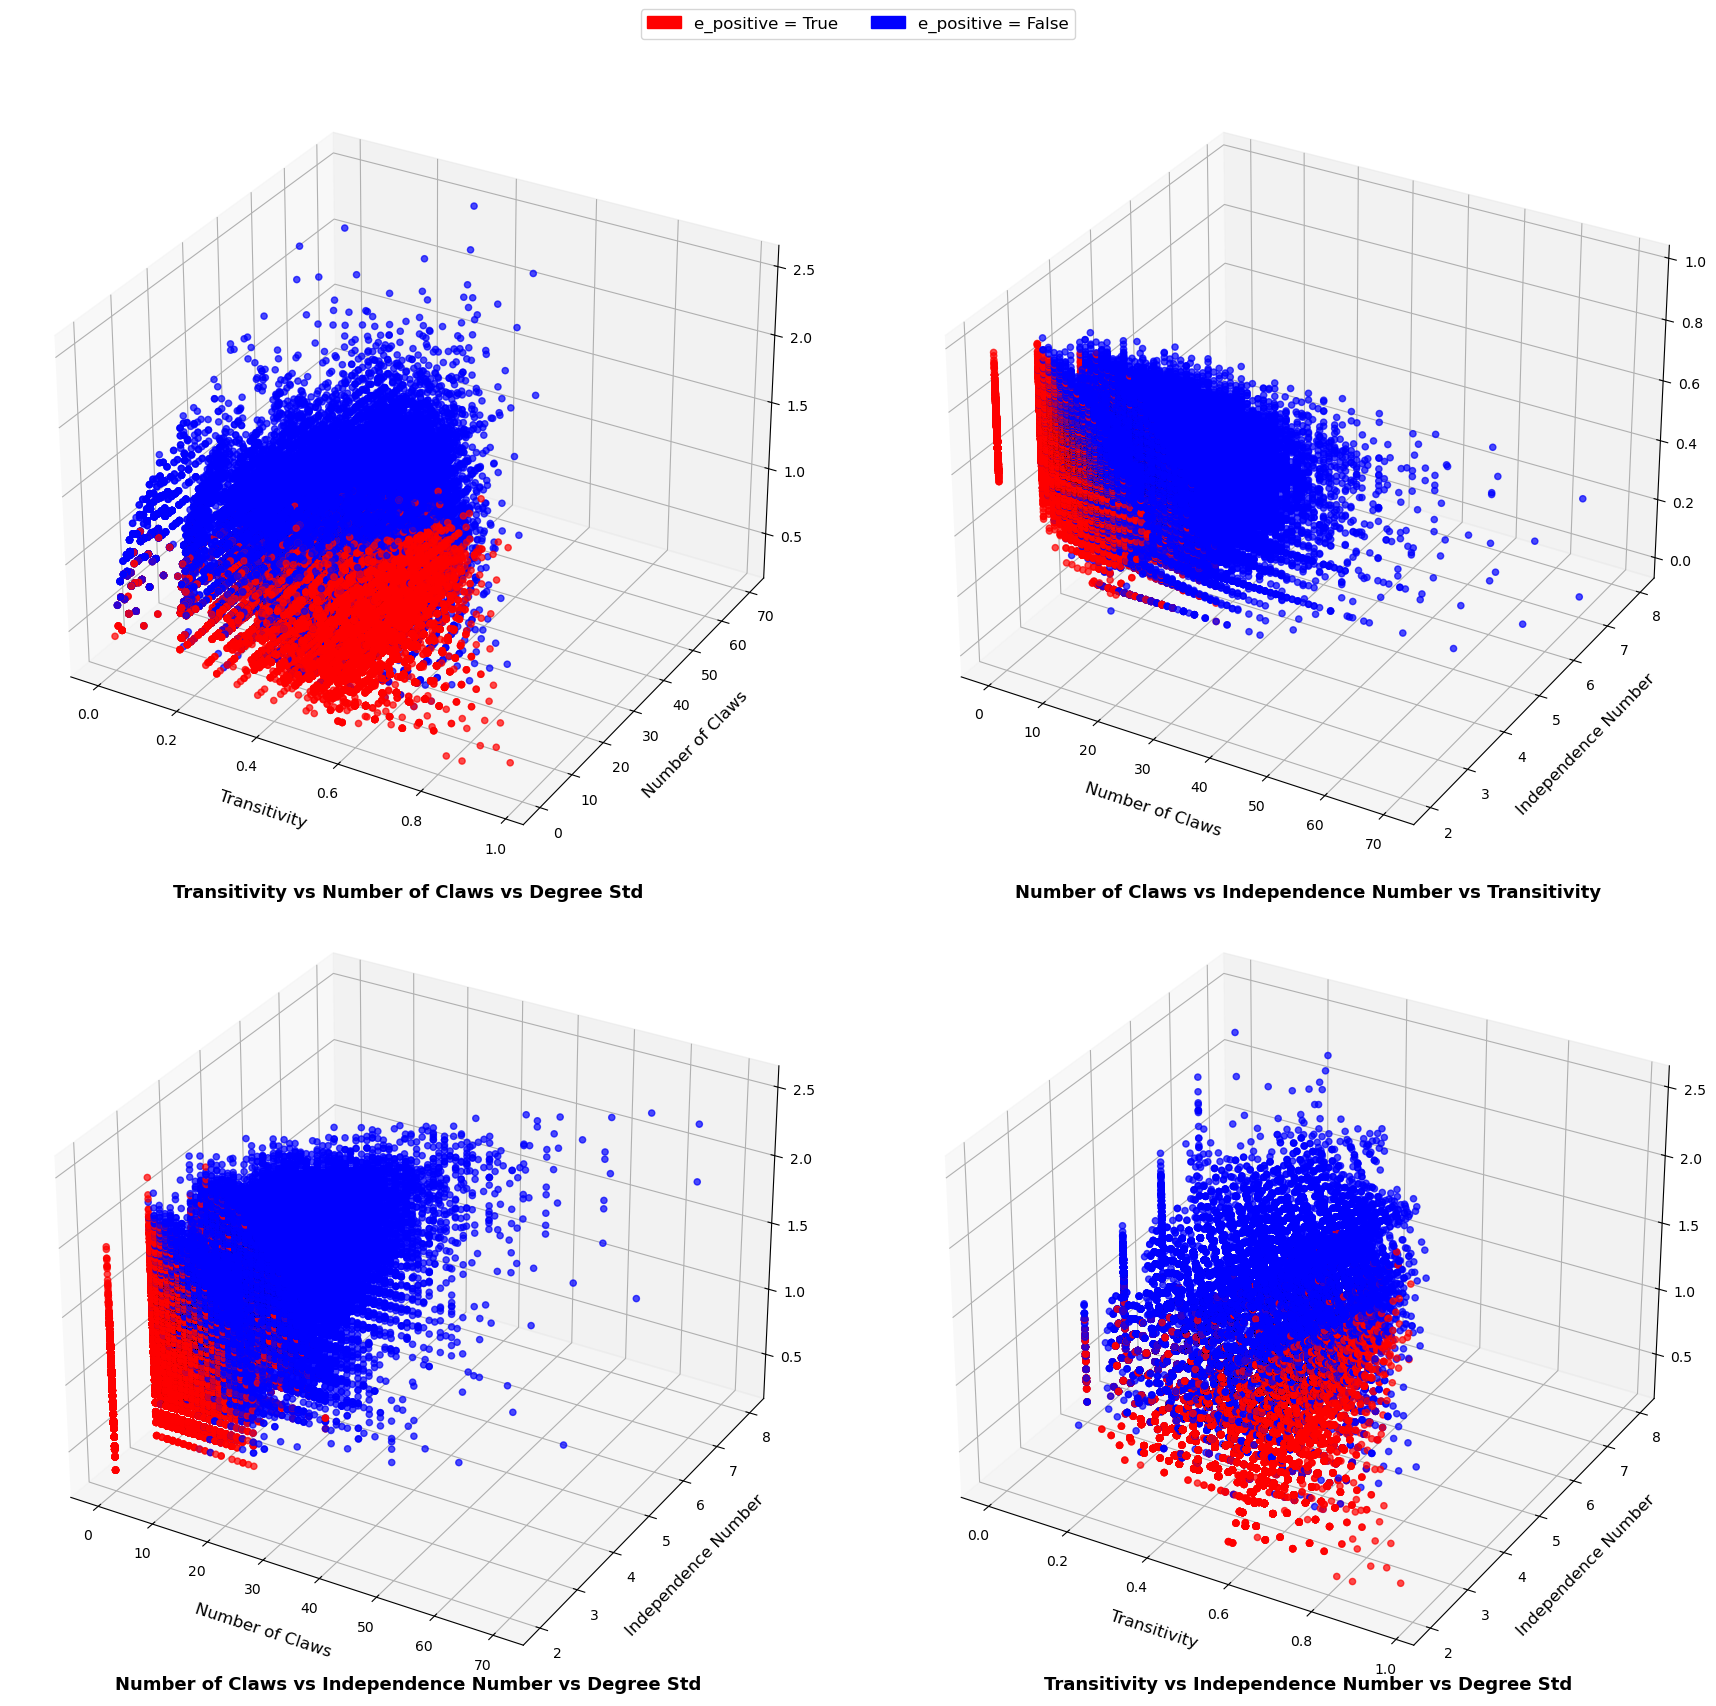

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches


# Create color array based on 'e_pos'
colors = ['red' if e == 1 else 'blue' for e in df['e_pos']]


fig = plt.figure(figsize=(18, 18))


ax1 = fig.add_subplot(221, projection='3d')
scatter1 = ax1.scatter(df['transitivity'], df['num_claws'], df['degree_std'], 
                      c=colors, alpha=0.7, s=20)  
ax1.set_xlabel('Transitivity', fontsize=12, labelpad=10)
ax1.set_ylabel('Number of Claws', fontsize=12, labelpad=10)


ax2 = fig.add_subplot(222, projection='3d')
scatter2 = ax2.scatter(df['num_claws'], df['independence_number'], df['transitivity'], 
                      c=colors, alpha=0.7, s=20) 
ax2.set_xlabel('Number of Claws', fontsize=12, labelpad=10)
ax2.set_ylabel('Independence Number', fontsize=12, labelpad=10)


ax3 = fig.add_subplot(223, projection='3d')
scatter3 = ax3.scatter(df['num_claws'], df['independence_number'], df['degree_std'],  
                      c=colors, alpha=0.7, s=20) 
ax3.set_xlabel('Number of Claws', fontsize=12, labelpad=10)
ax3.set_ylabel('Independence Number', fontsize=12, labelpad=10)


ax4 = fig.add_subplot(224, projection='3d')
scatter4 = ax4.scatter(df['transitivity'], df['independence_number'], df['degree_std'], 
                      c=colors, alpha=0.7, s=20)  
ax4.set_xlabel('Transitivity', fontsize=12, labelpad=10)
ax4.set_ylabel('Independence Number', fontsize=12, labelpad=10)


fig.text(0.25, 0.46, 'Transitivity vs Number of Claws vs Degree Std', 
         ha='center', va='top', fontsize=13, fontweight='bold')
fig.text(0.75, 0.46, 'Number of Claws vs Independence Number vs Transitivity', 
         ha='center', va='top', fontsize=13, fontweight='bold')
fig.text(0.25, 0.02, 'Number of Claws vs Independence Number vs Degree Std', 
         ha='center', va='top', fontsize=13, fontweight='bold')
fig.text(0.75, 0.02, 'Transitivity vs Independence Number vs Degree Std', 
         ha='center', va='top', fontsize=13, fontweight='bold')




red_patch = mpatches.Patch(color='red', label='e_positive = True')
blue_patch = mpatches.Patch(color='blue', label='e_positive = False')


fig.legend(handles=[red_patch, blue_patch], 
           loc='upper center', 
           bbox_to_anchor=(0.5, 0.95),  
           ncol=2, 
           fontsize=12,
           frameon=True)

plt.tight_layout(rect=[0, 0, 1, 0.92])  
plt.show()

1892